In [89]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df_gg = pd.read_csv('data/transformed/gg_piv.csv')
df_oscar = pd.read_csv('data/transformed/oscar_piv.csv')
df_sag = pd.read_csv('data/transformed/sag_piv.csv')
df_bafta = pd.read_csv('data/transformed/bafta_piv.csv')
df_critics = pd.read_csv('data/transformed/critics_piv.csv')

In [91]:
#preparando para a futura att
pd.set_option('future.no_silent_downcasting', True)

df_gg = df_gg.replace({True: 1, False: 0})
df_oscar = df_oscar.replace({True: 1, False: 0})
df_sag = df_sag.replace({True: 1, False: 0})
df_bafta = df_bafta.replace({True: 1, False: 0})
df_critics = df_critics.replace({True: 1, False: 0})

df_gg

,nome,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,participou_2023,participou_2024,indicada_gg,ganhou_gg
0,Alana Haim,0,0,0,0,0,0,0,1,0,0,0,1,0
1,Alicia Vikander,0,1,0,0,0,0,0,0,0,0,0,1,0
2,Alma Pöysti,0,0,0,0,0,0,0,0,0,1,0,1,0
3,Amy Adams,1,0,1,0,0,0,0,0,0,0,1,1,1
4,Amy Schumer,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Scarlett Johansson,0,0,0,0,0,1,0,0,0,0,0,1,0
72,Tilda Swinton,0,0,0,0,0,0,0,0,0,0,1,1,0
73,Vanessa Kirby,0,0,0,0,0,0,1,0,0,0,0,1,0
74,Viola Davis,0,0,0,0,0,0,1,0,1,0,0,1,0


In [92]:
print(f"df_gg tem {df_gg.shape[0]} linhas")
print(f"df_oscar tem {df_oscar.shape[0]} linhas")
print(f"df_sag tem {df_sag.shape[0]} linhas")
print(f"df_bafta tem {df_bafta.shape[0]} linhas")
print(f"df_critics tem {df_critics.shape[0]} linhas")

df_gg tem 76 linhas
df_oscar tem 46 linhas
df_sag tem 43 linhas
df_bafta tem 50 linhas
df_critics tem 55 linhas


In [93]:
dfs_juntos = pd.concat([df_gg, df_oscar, df_sag, df_bafta, df_critics])

dfs_juntos = dfs_juntos.groupby('nome').sum()

dfs_juntos = dfs_juntos.fillna(0)

dfs_juntos

,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,participou_2023,...,indicada_gg,ganhou_gg,indicada_os,ganhou_os,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics
nome,,,,,,,,,,,,,,,,,,,,,
Alana Haim,0,0,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,1,0,1,0
Alfre Woodard,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Alicia Vikander,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
Alma Pöysti,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Amy Adams,2,0,4,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viola Davis,0,0,0,0,1,0,4,0,4,0,...,1,0,1,0,1,1,1,0,1,0
Vivian Oparah,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
Wunmi Mosaku,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [94]:
# Somar todas as colunas "participou_{ano}" para criar a coluna "num_part"
dfs_juntos['num_part'] = dfs_juntos.filter(like='participou_').sum(axis=1)

"""
cols_to_drop = [col for col in dfs_juntos.columns if col.startswith('participou_')]
dfs_juntos = dfs_juntos.drop(columns=cols_to_drop)
"""
dfs_juntos

,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,participou_2023,...,ganhou_gg,indicada_os,ganhou_os,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,num_part
nome,,,,,,,,,,,,,,,,,,,,,
Alana Haim,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,1,0,1,0,3
Alfre Woodard,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Alicia Vikander,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
Alma Pöysti,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Amy Adams,2,0,4,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viola Davis,0,0,0,0,1,0,4,0,4,0,...,0,1,0,1,1,1,0,1,0,9
Vivian Oparah,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
Wunmi Mosaku,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [95]:
num_part = dfs_juntos.pop('num_part')
dfs_juntos.insert(0, 'num_part', num_part)

dfs_juntos

,num_part,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,...,indicada_gg,ganhou_gg,indicada_os,ganhou_os,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics
nome,,,,,,,,,,,,,,,,,,,,,
Alana Haim,3,0,0,0,0,0,0,0,3,0,...,1,0,0,0,0,0,1,0,1,0
Alfre Woodard,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Alicia Vikander,2,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
Alma Pöysti,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Amy Adams,8,2,0,4,0,0,0,1,0,0,...,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viola Davis,9,0,0,0,0,1,0,4,0,4,...,1,0,1,0,1,1,1,0,1,0
Vivian Oparah,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Wunmi Mosaku,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [96]:
ganhou_os = dfs_juntos.pop('ganhou_os')
dfs_juntos['ganhou_os'] = ganhou_os

dfs_juntos

,num_part,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,...,indicada_gg,ganhou_gg,indicada_os,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,ganhou_os
nome,,,,,,,,,,,,,,,,,,,,,
Alana Haim,3,0,0,0,0,0,0,0,3,0,...,1,0,0,0,0,1,0,1,0,0
Alfre Woodard,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Alicia Vikander,2,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
Alma Pöysti,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Amy Adams,8,2,0,4,0,0,0,1,0,0,...,1,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viola Davis,9,0,0,0,0,1,0,4,0,4,...,1,0,1,1,1,1,0,1,0,0
Vivian Oparah,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Wunmi Mosaku,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [97]:
print(f"Quantas atrizes 'ganhou_os': {dfs_juntos['ganhou_os'].astype(int).sum()}")

Quantas atrizes 'ganhou_os': 8


In [98]:
#removendo as que n foram indicadas ao oscar nenhuma vez
dfs_juntos = dfs_juntos[dfs_juntos['indicada_os'] != 0]
#e a coluna 'indicada_os' q n precisamos mais
dfs_juntos = dfs_juntos.drop(columns=['indicada_os'])
dfs_juntos

,num_part,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,...,participou_2024,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,ganhou_os
nome,,,,,,,,,,,,,,,,,,,,,
Ana de Armas,5,0,0,0,0,0,1,0,0,4,...,0,1,0,1,0,1,0,0,0,0
Andra Day,3,0,0,0,0,0,0,3,0,0,...,0,1,1,0,0,0,0,1,0,0
Andrea Riseborough,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Annette Bening,6,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
Brie Larson,5,0,5,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
Carey Mulligan,9,0,0,0,0,0,0,4,0,0,...,0,1,0,1,0,1,0,1,1,0
Cate Blanchett,11,0,5,0,0,0,1,0,0,5,...,0,1,1,1,0,1,1,1,1,0
Charlize Theron,7,0,1,0,0,1,5,0,0,0,...,0,1,0,1,0,1,0,1,0,0
Charlotte Rampling,2,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
matriz_correlacao = dfs_juntos.corr()
matriz_correlacao

,num_part,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,...,participou_2024,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,ganhou_os
num_part,1.000000,-0.057172,0.330441,0.123144,0.495791,0.166573,0.264520,0.195341,0.152217,0.196581,...,0.031688,0.441708,0.207123,0.648242,0.142929,0.618144,0.320862,0.364353,0.324445,0.244188
participou_2014,-0.057172,1.000000,-0.122070,-0.129237,-0.139234,-0.079609,-0.126603,-0.063270,-0.115018,-0.135404,...,-0.122791,0.103537,0.043474,0.142836,-0.009326,0.180975,0.047231,0.103537,-0.025669,0.047231
participou_2015,0.330441,-0.122070,1.000000,-0.140158,0.130899,-0.074724,0.207201,-0.130750,-0.110878,0.160196,...,-0.075159,-0.005104,0.318248,0.044715,-0.010115,0.092095,0.269388,0.112286,0.160481,0.051222
participou_2016,0.123144,-0.129237,-0.140158,1.000000,0.079933,-0.152877,-0.145363,-0.138427,-0.035089,-0.155468,...,-0.140986,0.118879,-0.034317,0.018598,0.019632,0.035165,0.044187,0.118879,0.190708,0.088373
participou_2017,0.495791,-0.139234,0.130899,0.079933,1.000000,-0.164703,0.049220,0.129283,-0.062105,-0.024406,...,-0.099905,0.128074,0.001320,0.227561,0.045323,0.209720,0.044204,0.128074,0.023481,0.122412
participou_2018,0.166573,-0.079609,-0.074724,-0.152877,-0.164703,1.000000,-0.096769,-0.085270,0.396543,-0.058155,...,-0.134544,0.014132,0.057113,0.181291,-0.007779,0.193684,0.019260,0.122475,0.111841,0.019260
participou_2019,0.264520,-0.126603,0.207201,-0.145363,0.049220,-0.096769,1.000000,-0.135606,-0.158120,-0.051417,...,0.116015,0.116456,0.006724,0.236849,-0.034618,0.275586,0.065795,0.062886,-0.017935,0.025972
participou_2020,0.195341,-0.063270,-0.130750,-0.138427,0.129283,-0.085270,-0.135606,1.000000,-0.150574,0.049048,...,-0.131522,0.110899,0.013097,0.116717,0.143185,0.159549,0.050589,0.110899,0.121300,0.050589
participou_2021,0.152217,-0.115018,-0.110878,-0.035089,-0.062105,0.396543,-0.158120,-0.150574,1.000000,-0.114996,...,-0.102238,0.064655,0.037329,0.020230,-0.021355,-0.229503,0.048064,0.064655,0.124466,0.240321
participou_2022,0.196581,-0.135404,0.160196,-0.155468,-0.024406,-0.058155,-0.051417,0.049048,-0.114996,1.000000,...,-0.147714,0.067258,0.040270,0.109899,0.114364,0.159161,0.070369,-0.161917,-0.055946,0.070369


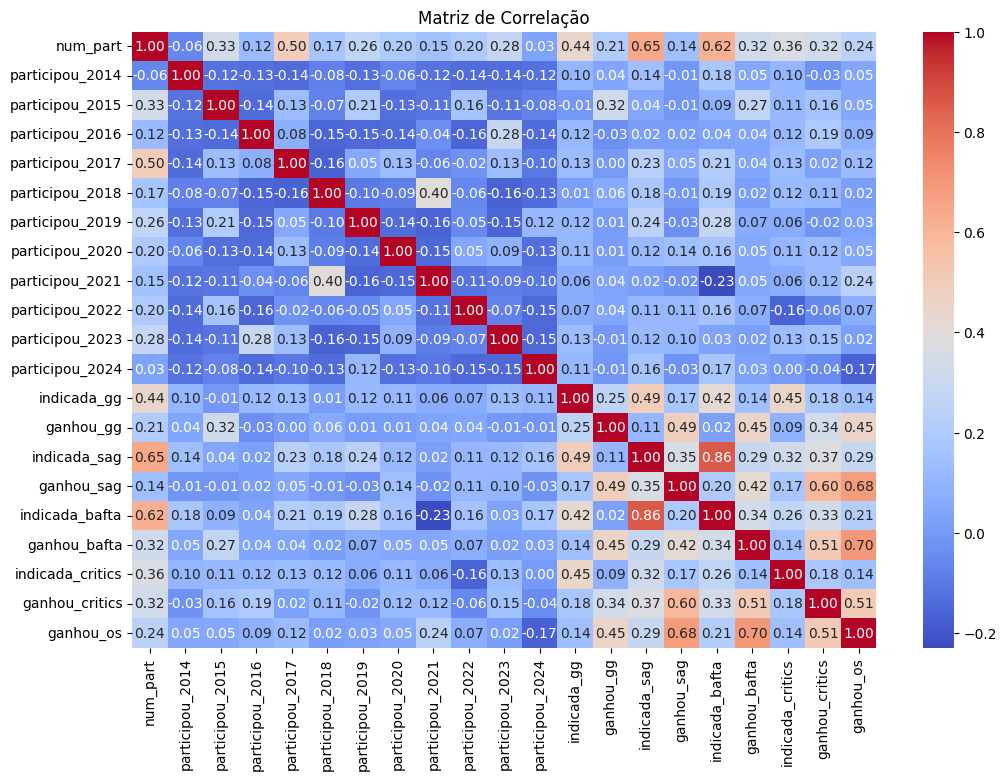

In [100]:
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

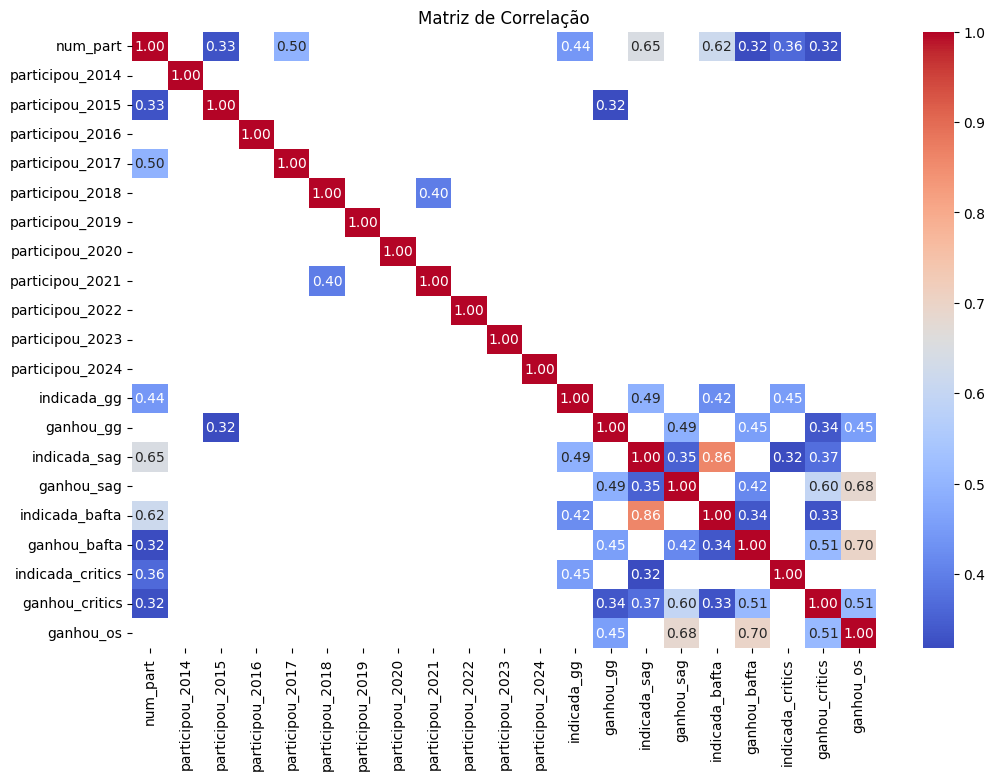

In [101]:
#somente as de maior correlação (> 0.3)
matriz_correlacao_filtrada = matriz_correlacao[matriz_correlacao > 0.3].dropna(how='all', axis=0).dropna(how='all', axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao_filtrada, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

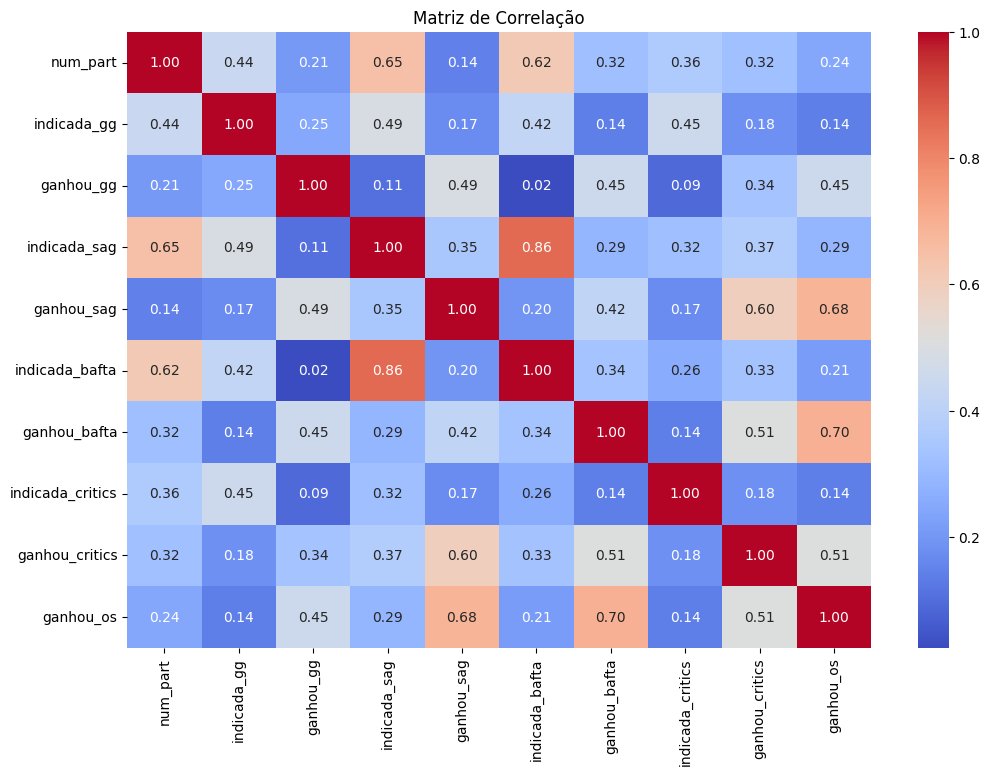

In [102]:
cols_to_drop = [col for col in dfs_juntos.columns if col.startswith('participou_')]
df_maior_corr = dfs_juntos.drop(columns=cols_to_drop)

plt.figure(figsize=(12, 8))
sns.heatmap(df_maior_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [103]:
#vai ficar para cada treinamento

'''#tirando as divas de 2024

remover = df_oscar[df_oscar['participou_2024'] == 1]
remover

df_maior_corr = df_maior_corr[~df_maior_corr['nome'].isin(remover['nome'])].reset_index(drop=True)
df_maior_corr
'''

"#tirando as divas de 2024\n\nremover = df_oscar[df_oscar['participou_2024'] == 1]\nremover\n\ndf_maior_corr = df_maior_corr[~df_maior_corr['nome'].isin(remover['nome'])].reset_index(drop=True)\ndf_maior_corr\n"

In [104]:
dfs_juntos.to_csv('data/final/df_final.csv')
print('Salvo')

Salvo
